In [1]:
import pandas as pd

In [75]:
dataset_df = pd.read_csv('googleplaystore.csv')

In [11]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
len(data)

10841

In [12]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
data['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
8 Ball Pool                                          7
                                                    ..
Camera ZOOM FX - FREE                                1
Pocket                                               1
Sticker Market: Emoji keyboard                       1
XX HD Video downloader-Free Video Downloader         1
Find Lover                                           1
Name: App, Length: 9660, dtype: int64

In [14]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import seaborn as sns

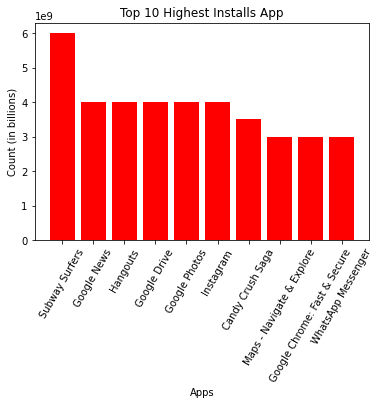

In [37]:
"""
App with the largest number of installs
"""
data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
i = data[data['Category'] == '1.9'].index
data.loc[i]
data = data.drop(i)

data['Installs'] = data['Installs'].astype(int)
res = data.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App", "Installs", data = final_result, color = "red")
plt.xlabel("Apps")
plt.xticks(rotation = 60)
plt.ylabel("Count (in billions)")
plt.title("Top 10 Highest Installs App")
plt.show()

Text(0.5, 1.0, 'popularity by category')

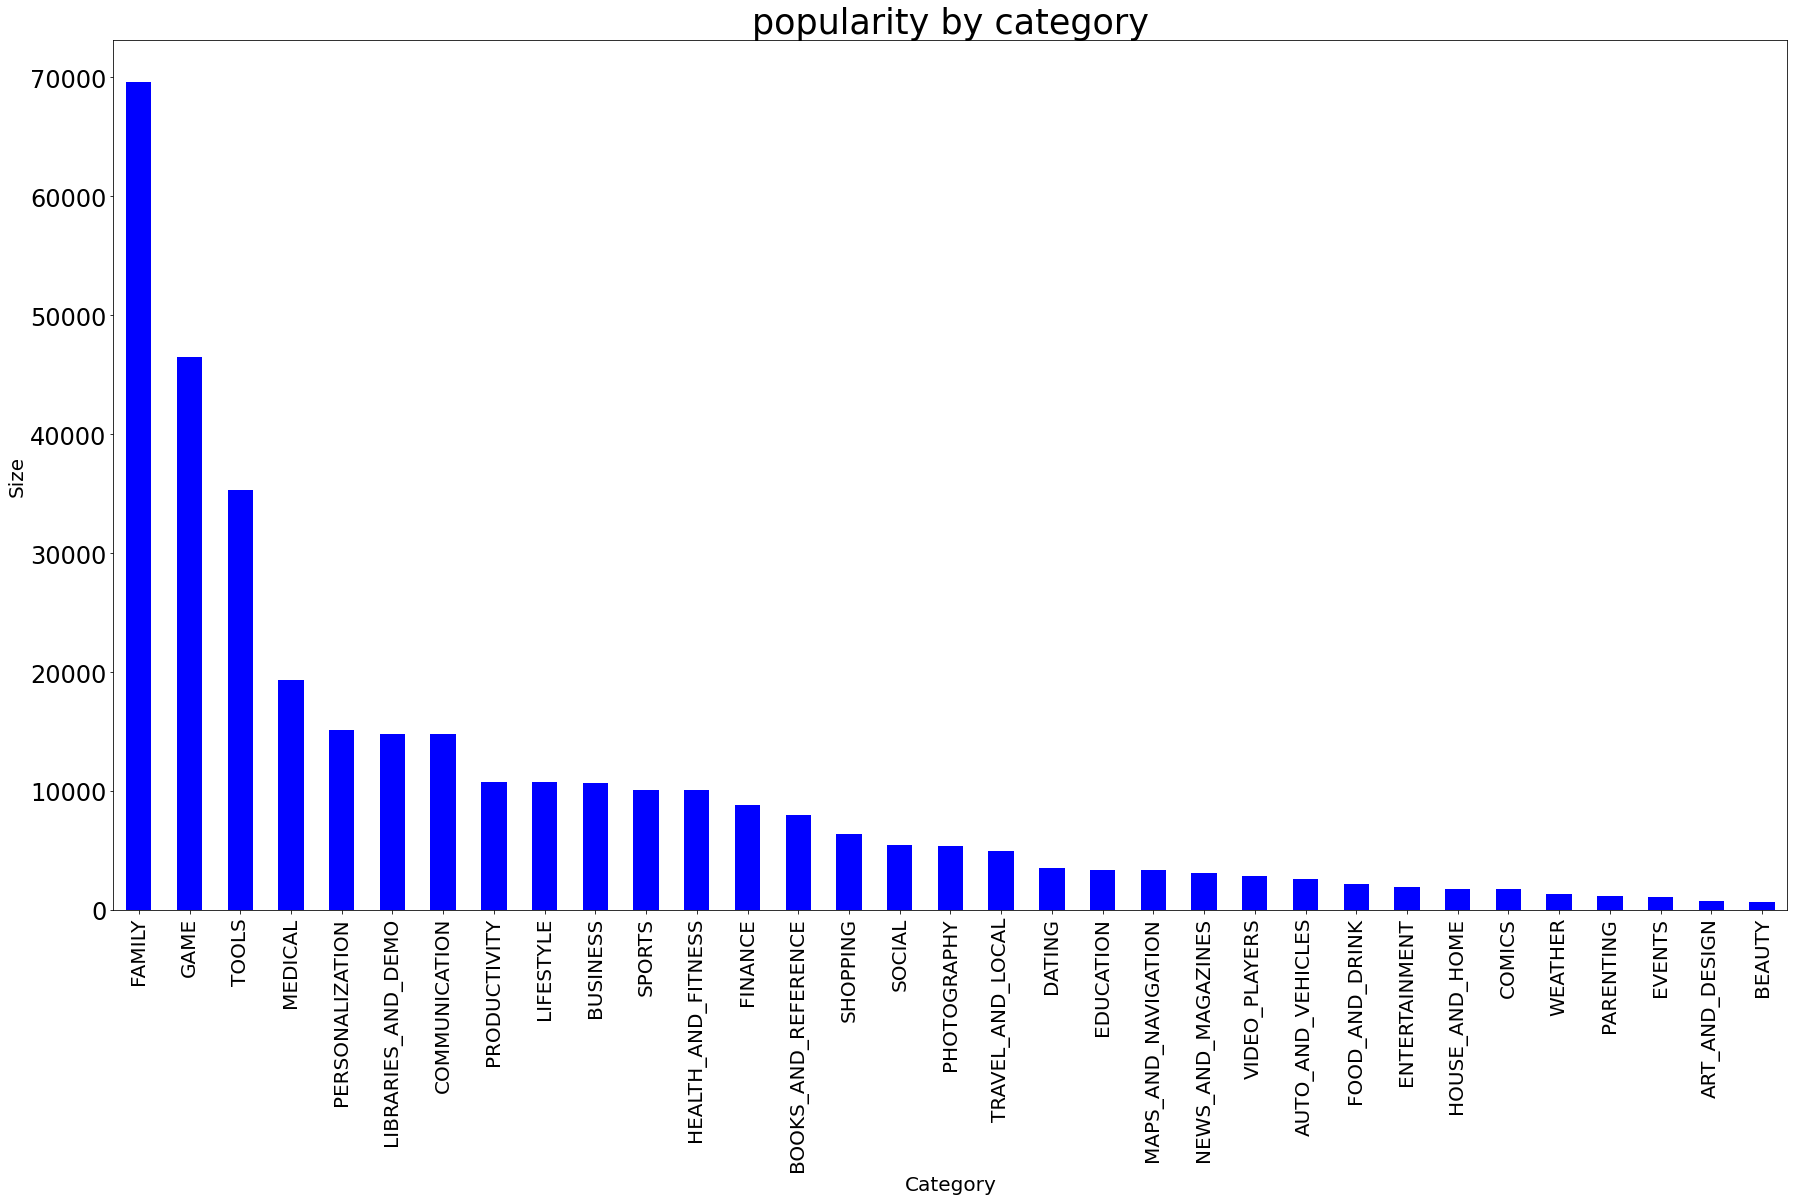

In [41]:
"""
Most Popular Category
"""
data.loc[data['Size'] == 'Varies with device'].shape
unwanted = data.loc[data['Size'] == 'Varies with device']
unwanted.shape
data.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
res = data.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)
plt.title("popularity by category", fontsize = 35)

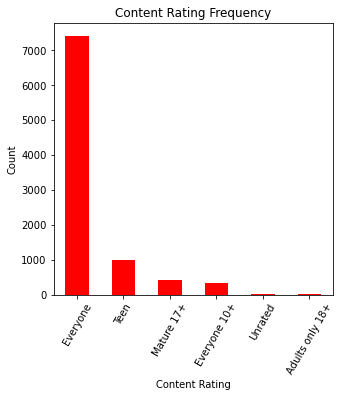

In [45]:
plt.figure(figsize=(5,5))
data['Content Rating'].value_counts().plot(kind='bar', color = "red")
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation = 60)
plt.title("Content Rating Frequency")
plt.show()

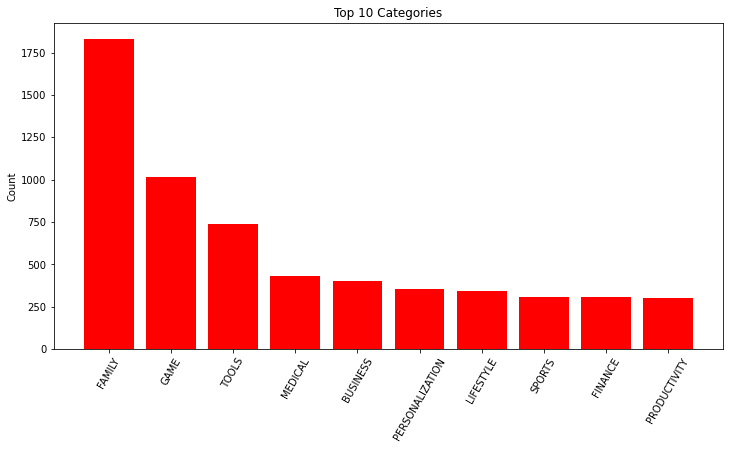

In [51]:
top_categories = data.Category.value_counts().head(10)
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
plt.title('Top 10 Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.bar(top_categories.index, top_categories, color = "red");


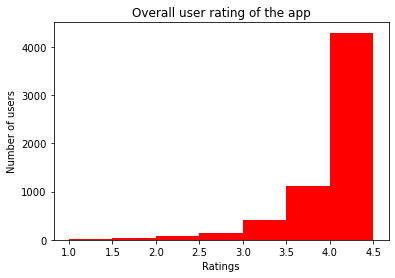

In [56]:
content_rating = data.Rating.value_counts()
plt.figure()
plt.title('App Rating')
plt.xlabel('Ratings')
plt.ylabel('Number of users')

plt.hist(data.Rating, bins=np.arange(1,5,0.5), color='red');

In [59]:
genres = data.Genres.value_counts().head(10)
plt.bar(genres)
plt.title('Top 10 Genres')
plt.ylabel(None);
plt.xlabel('Count');

TypeError: bar() missing 1 required positional argument: 'height'

In [64]:
sorte = data.sort_values(['Reviews'],ascending = 0 )[:20]
ax = plt.bar(data.sort_values(['Reviews'] , data.sort_values(['App'])))

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [67]:
import seaborn as sns
sorte = data.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = sorte )
ax.set_xlabel('Reviews')
ax.set_title("Most Reviewed Apps in Play Store", size = 20)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

Printing the values of Mean, Median, Mode respectively : 4.193338315362443 nan 4.4


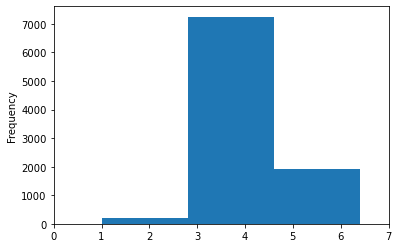

In [74]:
# mean,median and mode of rating and ploting the graph to find Skewness of the graph of the not null data
import scipy.stats as sc
mean_t = np.mean(t_dataset["Rating"])
median_t = np.median(t_dataset["Rating"])
mode_t = sc.mode(t_dataset["Rating"])
print("Printing the values of Mean, Median, Mode respectively :",mean_t,median_t,mode_t[0][0])
t_dataset["Rating"].plot(kind='hist')
plt.xlim(0,7)
plt.show()

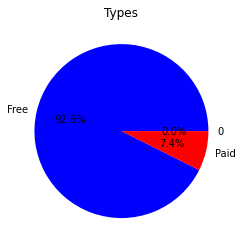

In [87]:
types = dataset_df.Type.value_counts()
plt.figure()
plt.title('Types')
plt.pie(types, labels=types.index, autopct='%1.1f%%', colors=['blue', 'red']);